<img src="http://iict-space.heig-vd.ch/apu/wp-content/uploads/sites/21/2022/01/2020-slim.png" alt="HEIG-VD Logo" width="100" align="right"/>

# Cours TAL - Laboratoire 3 : Analyse syntaxique du français

**Objectifs**

1. Utiliser un analyseur syntaxique **en constituants** pour extraire tous les groupes nominaux d'un texte.
1. Appliquer un analyseur syntaxique **de dépendances** sur des données de test en français et calculer son score.
1. Entraîner l'analyseur **de dépendances** sur des données adaptées et mesurer si les performances se sont améliorées ou non.

## 1.	Utiliser un analyseur syntaxique en constituants pour extraire les groupe nominaux

Vous utiliserez l'analyseur syntaxique en constituants appelé `LexicalizedParser` fourni parmi les outils CoreNLP de Stanford, et [documenté ici](https://nlp.stanford.edu/nlp/javadoc/javanlp/edu/stanford/nlp/parser/lexparser/LexicalizedParser.html).  


* **code Java** : fichier `stanford-corenlp-3.9.2.jar` (8 Mo) fourni sur Cyberlearn
* **modèle** : fichier `frenchFactored.ser.gz` (4 Mo) fourni sur Cyberlearn
* **données** : fichier `exemple.txt` fourni sur Cyberlearn

a. Veuillez écrire la ligne de commande (java) qui effecte l'analyse syntaxique en constituants du texte `exemple.txt`. Choisissez 'oneline' comme format et écrivez les résultats dans un ficher.

In [1]:
!java -cp stanford-corenlp-3.9.2.jar -mx5g edu.stanford.nlp.parser.lexparser.LexicalizedParser -writeOutputFiles -outputFormat oneline -v frenchFactored.ser exemple.txt > output.txt

Invoked on Fri Apr 14 11:02:20 CEST 2023 with arguments: -writeOutputFiles -outputFormat oneline -v frenchFactored.ser exemple.txt
Loading parser from serialized file frenchFactored.ser ... done [4.1 sec].
Grammar	States	Tags	Words	UnaryR	BinaryR	Taggings
Grammar	8711	295	29038	1992	33274	41024
ParserPack is edu.stanford.nlp.parser.lexparser.FrenchTreebankParserParams
Lexicon is edu.stanford.nlp.parser.lexparser.BaseLexicon
Tags are: [0=CLS-VN,1=V-VN,2=PUNC-comma,3=P-PP,4=DET-NP,5=NPP-NP,6=CC-COORD,7=NC-NP,8=P-PP-n,9=N-MWN,10=ADJ-MWN,11=P-de2-PP-n,12=ADJ-AP,13=PUNC,14=DET-MWN,15=ADJ-NP,16=ADJ-COORD,17=.$$.,18=P-de2-MWN,19=C-MWN,20=VPP-VN,21=PUNC-fs,22=N-NP,23=VPP-VPpart,24=PROREL-NP,25=ADV-Srel,26=ADV-SENT,27=P-de2-PP,28=PRO-SENT,29=PRO-NP,30=PRO-Srel,31=P-MWP,32=P-VPinf,33=CLO-VN,34=VINF-VN,35=P-de2-VPinf,36=ADV-VPpart,37=PUNC-colon,38=P-MWADV,39=N-MWADV,40=DET-MWP,41=N-MWP,42=P-de2-MWP,43=V-MWP,44=P-MWN,45=CLR-VN,46=CS-Ssub,47=ADV-VN,48=ADV-AdP,49=CLR-VPpart,50=VPR-VPpart,51=ADJ-MWAD

b. Importez le fichier de résultats du LexicalizedParser comme une liste d'arbres, en utilisant la classe `BracketParseCorpusReader` de NLTK.  Chaque ligne contenant une analyse syntaxique sera importée comme un objet `Tree` de NLTK. 

In [2]:
from nltk.corpus.reader.bracket_parse import BracketParseCorpusReader
root = '.'
forest = BracketParseCorpusReader(root, 'exemple.txt.stp').parsed_sents()

c. Cherchez dans la [documentation](https://www.nltk.org/_modules/nltk/tree.html#Tree) de `Tree` une fonction d'affichage, et affichez l'arbre de la première ligne.

In [3]:
forest[0].pretty_print()

                                   ROOT                                                
                                    |                                                   
                                   SENT                                                
       _____________________________|_______________________________________________    
      NP             |         |                           NP                       |  
  ____|_______       |         |          _________________|_____________           |   
 |    |       AP     VN      MWADV       |      |          AP            AP         |  
 |    |       |      |     ____|____     |      |          |         ____|____      |   
DET   NC     ADJ     V    P         N   DET     NC        ADJ      ADV       ADJ   PUNC
 |    |       |      |    |         |    |      |          |        |         |     |   
Les gares voyageurs sont  en       fait des ensembles fonctionnels plus     larges  .  



d.  Écrivez le code qui extrait les groupes nominaux de toutes les phrases (en anglais: Noun Phrases), et qui affiche les 5 les plus fréquents avec leurs nombres d'occurrences.

In [21]:
from collections import Counter

def get_nps(forest):
    nps = []
    for tree in forest:
        for s in tree.subtrees(lambda t: t.label() == 'NP'):
            nps.append(" ".join(s.leaves()))
    return nps

Counter(get_nps(forest)).most_common(5)

[('transport', 2),
 ('Le train', 2),
 ('marchandises', 2),
 ('le mot train', 2),
 ('Les gares voyageurs', 1)]

e. Veuillez répéter l'expérience avec un texte plus long (un texte en français du projet Gutenberg) et afficher les 20 groupes nominaux les plus fréquents.  Veuillez indiquer approximativement combien de temps a pris l'analyse syntaxique.

In [27]:
!java -cp stanford-corenlp-3.9.2.jar -mx5g edu.stanford.nlp.parser.lexparser.LexicalizedParser -writeOutputFiles -outputFormat oneline -v frenchFactored.ser le_conte_futur.txt > le_conte_futur_output.txt

# L'analyse syntaxique à pris 74 min sur notre machine

Invoked on Fri Apr 14 12:03:29 CEST 2023 with arguments: -writeOutputFiles -outputFormat oneline -v frenchFactored.ser french_book.txt
Loading parser from serialized file frenchFactored.ser ... done [2.4 sec].
Grammar	States	Tags	Words	UnaryR	BinaryR	Taggings
Grammar	8711	295	29038	1992	33274	41024
ParserPack is edu.stanford.nlp.parser.lexparser.FrenchTreebankParserParams
Lexicon is edu.stanford.nlp.parser.lexparser.BaseLexicon
Tags are: [0=CLS-VN,1=V-VN,2=PUNC-comma,3=P-PP,4=DET-NP,5=NPP-NP,6=CC-COORD,7=NC-NP,8=P-PP-n,9=N-MWN,10=ADJ-MWN,11=P-de2-PP-n,12=ADJ-AP,13=PUNC,14=DET-MWN,15=ADJ-NP,16=ADJ-COORD,17=.$$.,18=P-de2-MWN,19=C-MWN,20=VPP-VN,21=PUNC-fs,22=N-NP,23=VPP-VPpart,24=PROREL-NP,25=ADV-Srel,26=ADV-SENT,27=P-de2-PP,28=PRO-SENT,29=PRO-NP,30=PRO-Srel,31=P-MWP,32=P-VPinf,33=CLO-VN,34=VINF-VN,35=P-de2-VPinf,36=ADV-VPpart,37=PUNC-colon,38=P-MWADV,39=N-MWADV,40=DET-MWP,41=N-MWP,42=P-de2-MWP,43=V-MWP,44=P-MWN,45=CLR-VN,46=CS-Ssub,47=ADV-VN,48=ADV-AdP,49=CLR-VPpart,50=VPR-VPpart,51=ADJ-

In [28]:
forest2 = BracketParseCorpusReader(root, 'le_conte_futur.txt.stp').parsed_sents()

Counter(get_nps(forest2)).most_common(20)

[('qui', 40),
 ('--', 23),
 ('Philippe', 18),
 ('où', 12),
 ('Philomène', 11),
 ('...', 10),
 ('rien', 5),
 ('Dieu', 5),
 ('le monde', 5),
 ('ah', 5),
 ('Chaclos', 4),
 ('lui', 4),
 ('le colonel', 4),
 ('Le colonel', 4),
 ('le commandant', 4),
 ("l' amour", 4),
 ('Guides', 3),
 ("l' horizon", 3),
 ('le sol', 3),
 ('mon commandant', 3)]

## 2. Analyse de dépendances

Dans cette partie, vous utiliserez le [Stanford Dependency Parser](https://nlp.stanford.edu/software/nndep.html), un analyseur fondé sur un réseau de neurones.

* **code Java** : fichier `stanford-corenlp-3.9.2.jar` (8 Mo) fourni sur Cyberlearn (note: on peut le télécharger avec un [package fourni par Stanford](https://nlp.stanford.edu/software/lex-parser.html) ou depuis le [site Maven de Stanford CoreNLP](https://search.maven.org/artifact/edu.stanford.nlp/stanford-corenlp/3.9.2/jar))
* **modèle** : fichier `UD_French.gz` (10 Mo) fourni sur Cyberlearn (note: plusieurs modèles sont disponibles sur le site Maven, dont un package pour le français de 272 MB, mais ici vous aurez seulement besoin du modèle UD pour Universal Dependencies)
* **données** : les mêmes que pour le labo 2, disponibles dans [l'archive ZIP fournie par l'enseignant](https://drive.switch.ch/index.php/s/5ZNllZOApTWHGwH) (mot de passe = reference).  Ces textes en français proviennent du projet [Universal Dependencies (UD)](https://github.com/UniversalDependencies/UD_French-GSD).  Le fichier `fr-ud-train.conllu3` est destiné à l'entraînement, `fr-ud-dev.conllu3` à la validation, et `fr-ud-test.conllu3` à l'évaluation finale.

Pour effectuer les tâches suivantes, utilisez la [documentation](https://nlp.stanford.edu/nlp/javadoc/javanlp/edu/stanford/nlp/parser/nndep/DependencyParser.html) et regardez surtout le `main()` et les exemples données à la fin.

a. Exécuter le parser en Java (avec une commande externe `!java -cp ...` comme au labo 2) en l'appliquant au fichier UD de *test* en français.  Écrivez le résultat détaillé dans un fichier plutôt qu'à l'écran.  Quels sont les deux scores obtenus et que signifient-ils ?


In [36]:
# Veuillez écrire ici la commande pour tester le parser avec le modèle pré-entraîné.

!java -cp stanford-corenlp-3.9.2.jar -mx5g edu.stanford.nlp.parser.nndep.DependencyParser -model UD_French.gz -testFile fr-ud-test.conllu3 -outFile dep_output.txt -verboseResults false

Loading depparse model: UD_French.gz ... 
###################
#Transitions: 81
#Labels: 40
ROOTLABEL: root
PreComputed 99996, Elapsed Time: 15.987 (s)
Initializing dependency parser ... done [17.1 sec].
Test File: fr-ud-test.conllu3
OOV Words: 608 / 10020 = 6,07%
UAS = 55,0699
LAS = 41,1577
DependencyParser parsed 10020 words in 416 sentences in 5,1s at 1968,6 w/s, 81,7 sent/s.


Scores obtenus :
UAS : 55,0699
LAS : 41,1577

Le score UAS (Unlabeled Attachment Score) est le pourcentage de dépendances correctement prédites par le parser, sans tenir compte de l'étiquette de dépendance. Le score LAS (Labeled Attachment Score) est le pourcentage de dépendances correctement prédites par le parser, en tenant compte de l'étiquette de dépendance.

## 3. Entraîner l'analyseur de dépendances

a. Veuillez entraîner l'analyseur en suivant les indications suivantes:
* donnez un nouveau nom au modèle qui sera créé (ne pas écraser l'ancien)
* utilisez à la fois `train` et `dev` comme indiqué dans la documentation
* évitez un output trop verbeux en le redirigeant vers un fichier `output.txt` (ajoutez `>output.txt 2>&1` à la commande)
* plusieurs options indiquées dans la documentation peuvent être utiles
  * `-wordCutOff 3` pour traiter seulement les mots apparaissant plus de 3 fois, ce qui évite en particulier le problème des nombres écrits avec un espace (apparaissant 1 fois)
  * `-trainingThreads 4` pour utiliser pleinement votre processeur : indiquez le maximum selon votre modèle
  * `-maxIter 5000` pour arrêter l'entraînement après 5000 itérations (essayez d'abord beaucoup moins pour vous faire une idée du temps, puis si vous le pouvez, allez plus loin que 5000)

In [1]:
!java -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.nndep.DependencyParser \
    -trainFile fr-ud-train.conllu3 \
    -devFile fr-ud-dev.conllu3 \
    -model new_model.gz \
    -wordCutOff 3 \
    -maxIter 5000 \
    -trainingThreads 4 \
    >output2.txt 2>&1

b. Quels sont les scores (sur les données de test) du système que vous avez entraîné ?  Comment se comparent-ils avec ceux du système par défaut ?

In [2]:
# Veuillez écrire ici la commande pour tester l'analyseur avec le nouveau modèle.
!java -cp stanford-corenlp-3.9.2.jar -mx5g edu.stanford.nlp.parser.nndep.DependencyParser -model new_model.gz -testFile fr-ud-test.conllu3 -outFile dep_output2.txt -verboseResults false

Loading depparse model: new_model.gz ... 
Loaded TreebankLanguagePack: edu.stanford.nlp.trees.PennTreebankLanguagePack
###################
#Transitions: 91
#Labels: 45
ROOTLABEL: root
PreComputed 100000, Elapsed Time: 1.344 (s)
Initializing dependency parser ... done [2.3 sec].
Test File: fr-ud-test.conllu3
OOV Words: 1100 / 10020 = 10,98%
UAS = 78,5329
LAS = 72,0758
DependencyParser parsed 10020 words in 416 sentences in 0,9s at 11309,3 w/s, 469,5 sent/s.


Scores obtenus : UAS : 78,5329, LAS : 72,0758

Les scores sont bien meilleurs que ceux du système par défaut, à une hauteur de +23% pour UAS (unlabeled attachment score) et +31% pour LAS (labeled attachment score).

c. En traitant le fichier de logs du parser (après l'entraînement), collectez les scores UAS obtenus sur l'ensemble de développement (ou validation).  Affichez sur un graphe l'évolution du score au cours de l'entraînement.  À quelle itération obtenez-vous la valeur maximale de ce score ? Le nombre d'itérations de l'entraînement vous semble-t-il suffisant  ?

In [3]:
def parse_training_output(filename):
    data = []
    with open(filename, 'r') as f:
        l_data = {
            'iteration': 0,
            'uas' : 0,
        }
        for line in f:
            if 'Iteration' in line:
                l_data['iteration'] = int(line.split(' ')[2])
            elif line.startswith('UAS'):
                l_data['uas'] = float(line.split(' ')[1])
                data.append(l_data)
                l_data = {
                    'iteration': 0,
                    'uas' : 0,
                }
    return data

data = parse_training_output('output2.txt')
data

[{'iteration': 0, 'uas': 18.11802857062984},
 {'iteration': 100, 'uas': 22.878868357049008},
 {'iteration': 200, 'uas': 21.606888261440833},
 {'iteration': 300, 'uas': 4.020016214251768},
 {'iteration': 400, 'uas': 3.1310279276508903},
 {'iteration': 500, 'uas': 1.9401190908836767},
 {'iteration': 600, 'uas': 0.12580022923597328},
 {'iteration': 700, 'uas': 0.030751167146571244},
 {'iteration': 800, 'uas': 0.030751167146571244},
 {'iteration': 900, 'uas': 0.030751167146571244},
 {'iteration': 1000, 'uas': 0.030751167146571244},
 {'iteration': 1100, 'uas': 0.030751167146571244},
 {'iteration': 1200, 'uas': 41.95018310922256},
 {'iteration': 1300, 'uas': 55.76584383998211},
 {'iteration': 1400, 'uas': 56.023035419753434},
 {'iteration': 1500, 'uas': 57.476726957591346},
 {'iteration': 1600, 'uas': 59.08976545246149},
 {'iteration': 1700, 'uas': 60.834195297866984},
 {'iteration': 1800, 'uas': 63.69125828184843},
 {'iteration': 1900, 'uas': 64.49637974895866},
 {'iteration': 2000, 'uas': 

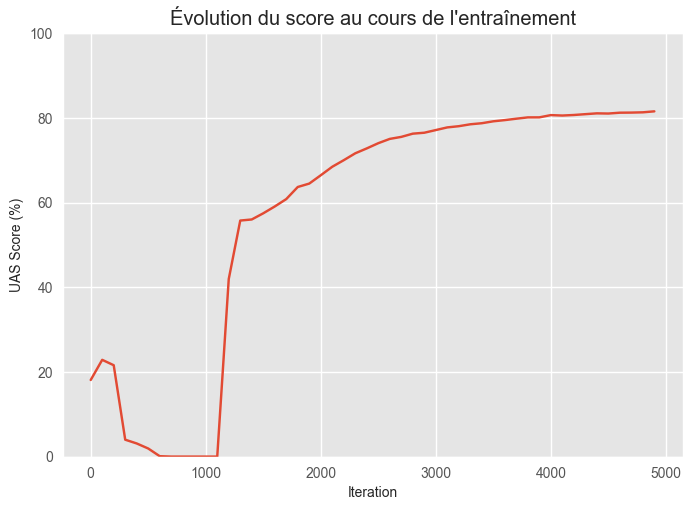

In [14]:
import matplotlib.pyplot
%matplotlib inline
matplotlib.pyplot.style.use('ggplot')
matplotlib.pyplot.plot([d['iteration'] for d in data], [d['uas'] for d in data])

matplotlib.pyplot.xlabel('Iteration')
matplotlib.pyplot.ylabel('UAS Score (%)')
matplotlib.pyplot.title('Évolution du score au cours de l\'entraînement')
matplotlib.pyplot.ylim(0, 100)
matplotlib.pyplot.show()

In [16]:
max(data, key=lambda d: d['uas'])

{'iteration': 4900, 'uas': 81.55489083335662}

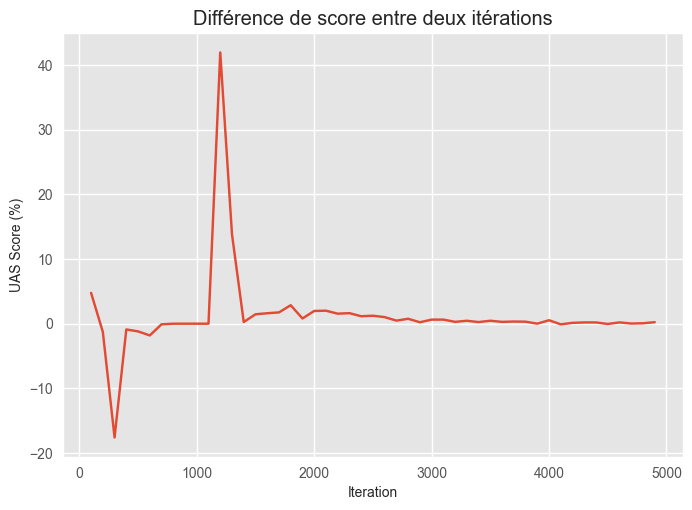

In [20]:
improvement_per_iteration = [data[i]['uas'] - data[i-1]['uas'] for i in range(1, len(data))]

matplotlib.pyplot.plot([d['iteration'] for d in data[1:]], improvement_per_iteration)
matplotlib.pyplot.xlabel('Iteration')
matplotlib.pyplot.ylabel('UAS Score (%)')
matplotlib.pyplot.title('Différence de score entre deux itérations')
matplotlib.pyplot.show()


Le meilleur score UAS est obtenu à la dernière itération, 5000. Le nombre d'itérations semble suffisant, à partir de 1500 itérations, l'amélioraion du score a une forme logarithmique. Je pense même qu'on pourrait s'arrêter entre 3500 et 4000 itérations car le score ne s'améliore pas de plus de 2%.

## Fin du laboratoire 3

Merci de nettoyer votre feuille et de la sauvegarder.  Puis soumettez-la sur Cyberlearn.